In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_raw = pd.read_table("video games sales.csv", sep=",")
df_raw.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df_raw.isna().sum() / len(df_raw) # процент пропусков по столбцам

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

Отбросим столбец с рейтингом и строки с пропусками в столбце Year

In [4]:
df = df_raw.dropna(subset=["Year"])
df = df.drop(columns=["Rank"])
df['Year'] = df['Year'].astype(int)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

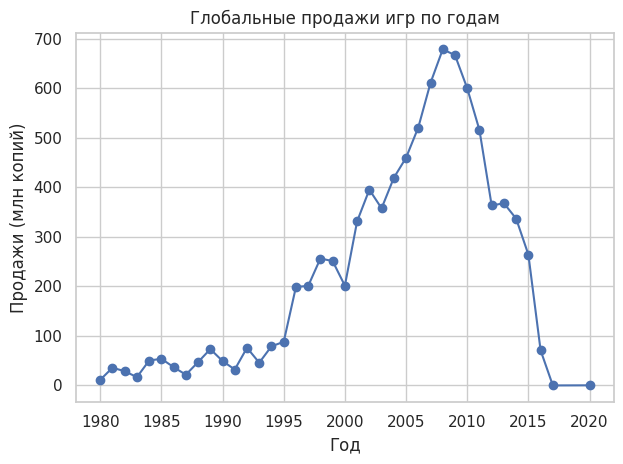

In [6]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.plot(kind='line', marker='o')
plt.title('Глобальные продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн копий)')
plt.grid(True)
plt.tight_layout()
plt.show()

Так как данных за последние годы мало, то удалим все строки после 2016 года

In [7]:
df = df[df["Year"] < 2016]

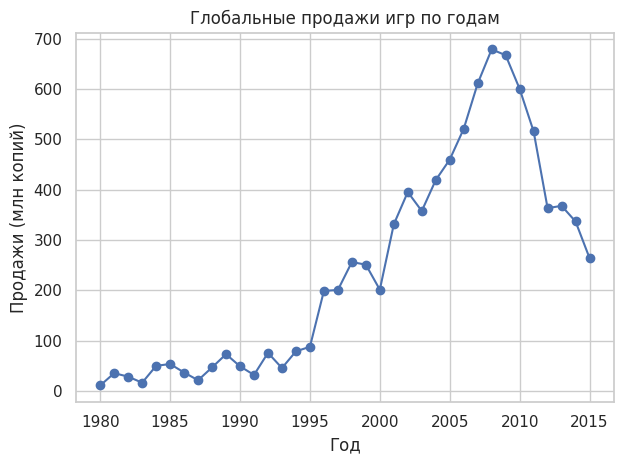

In [8]:
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.plot(kind='line', marker='o')
plt.title('Глобальные продажи игр по годам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн копий)')
plt.grid(True)
plt.tight_layout()
plt.show()

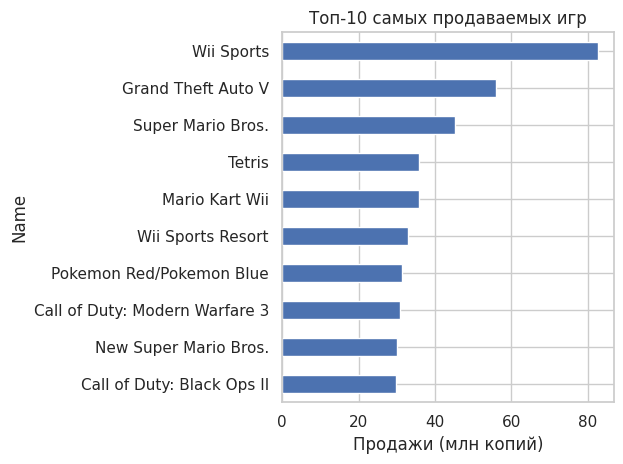

In [9]:
top_games = df[['Name', 'Global_Sales']].groupby('Name').sum().sort_values(by='Global_Sales', ascending=False).head(10)
top_games = top_games.sort_values('Global_Sales')  # чтобы были снизу вверх
top_games.plot(kind='barh', legend=False)
plt.title('Топ-10 самых продаваемых игр')
plt.xlabel('Продажи (млн копий)')
plt.tight_layout()
plt.show()

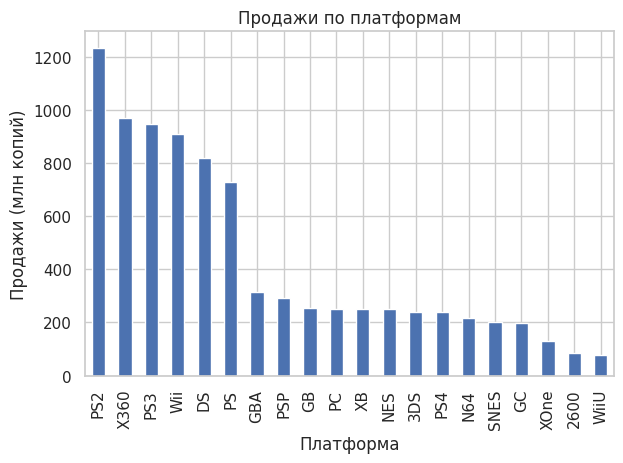

In [10]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales[:20].plot(kind='bar')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн копий)')
plt.tight_layout()
plt.show()

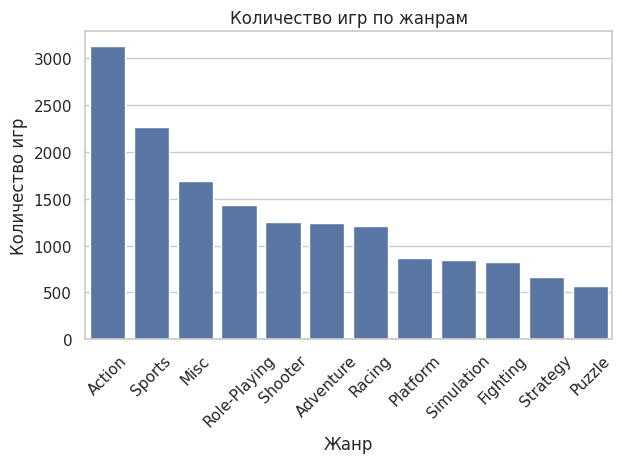

In [11]:
genre_counts = df['Genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Количество игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

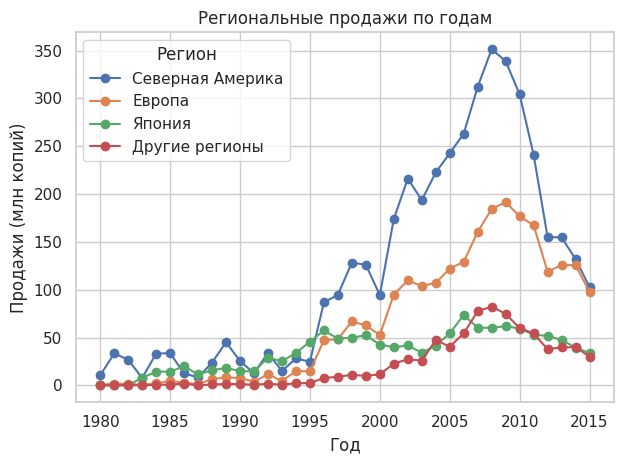

In [12]:
region_sales = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales = region_sales.rename(columns={
    'NA_Sales': "Северная Америка",
    'EU_Sales': "Европа",
    'JP_Sales': "Япония",
    'Other_Sales': "Другие регионы",
})
region_sales.plot(kind='line', marker='o')
plt.title('Региональные продажи по годам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн копий)')
plt.legend(title='Регион')
plt.grid(True)
plt.tight_layout()
plt.show()

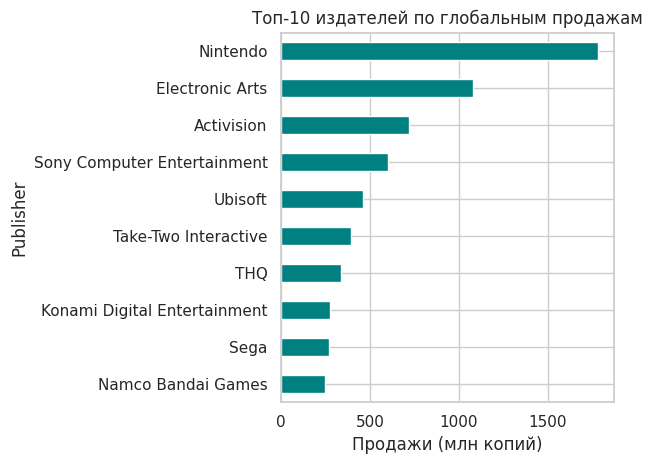

In [13]:
top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_publishers = top_publishers.sort_values()
top_publishers.plot(kind='barh', color='teal')
plt.title('Топ-10 издателей по глобальным продажам')
plt.xlabel('Продажи (млн копий)')
plt.tight_layout()
plt.show()

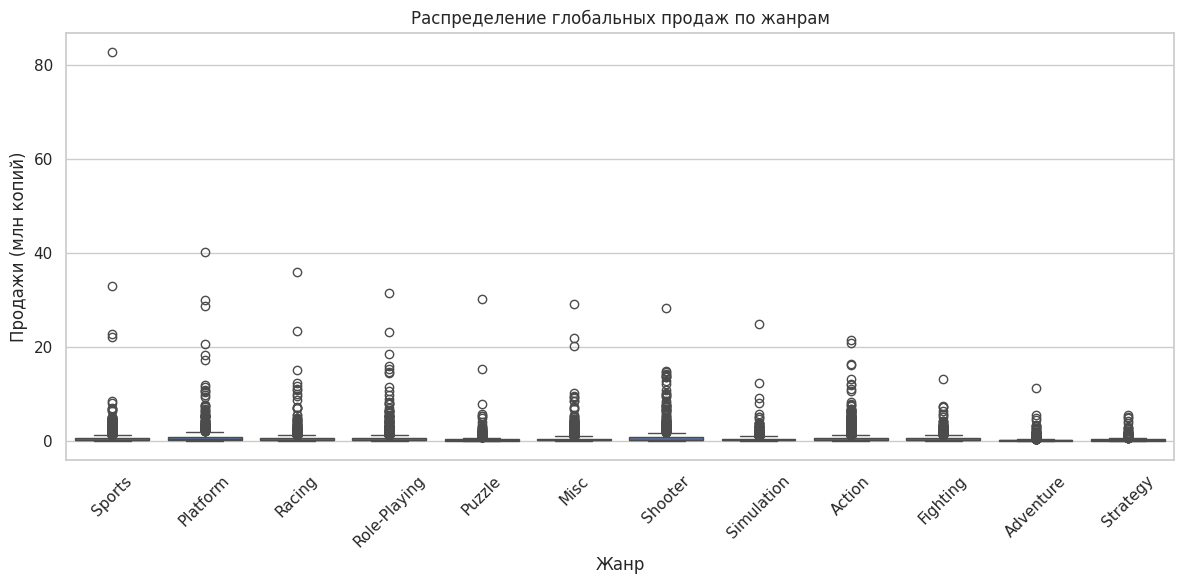

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Global_Sales')
plt.title('Распределение глобальных продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

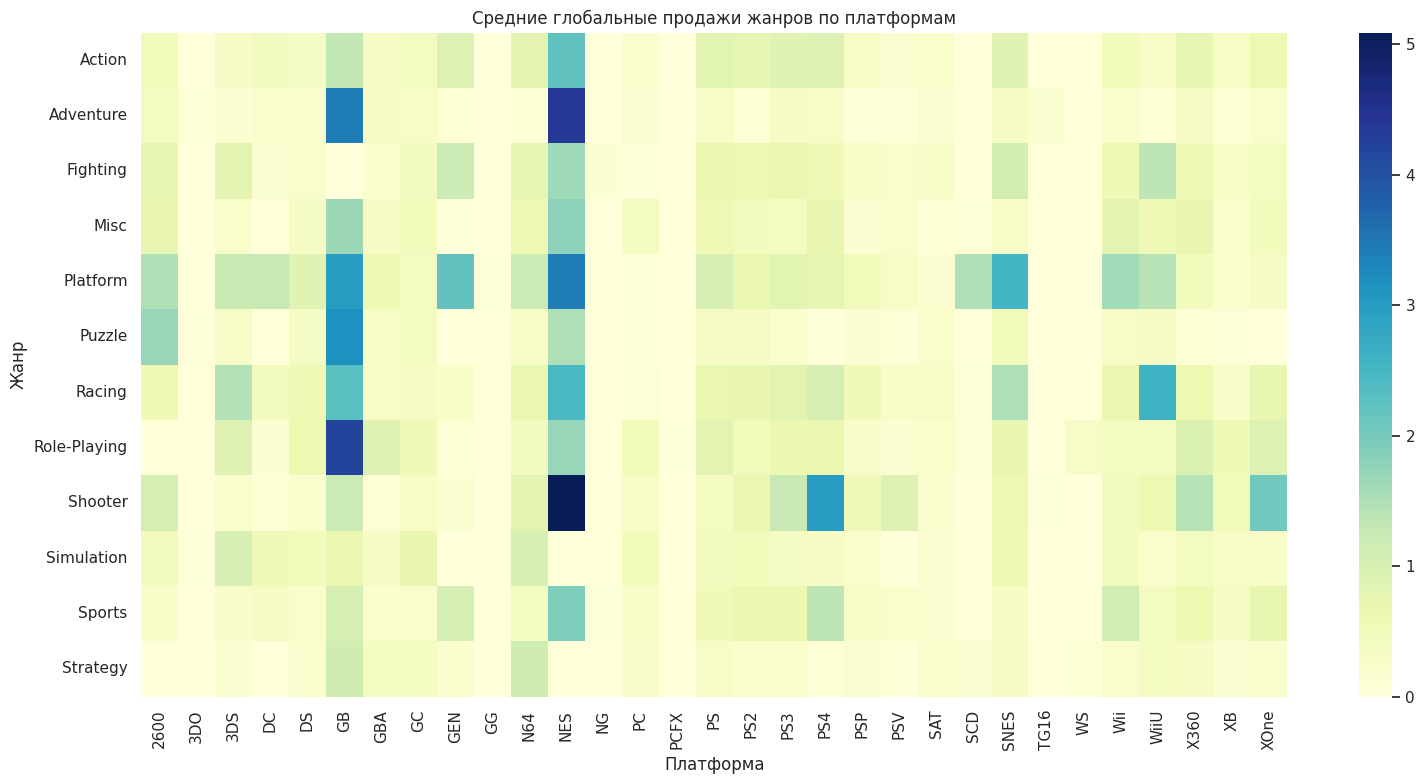

In [15]:
pivot_genre_platform = df.pivot_table(index='Genre', columns='Platform', values='Global_Sales', aggfunc='mean').fillna(0)
plt.figure(figsize=(16, 8))
sns.heatmap(pivot_genre_platform, annot=False, cmap='YlGnBu')
plt.title('Средние глобальные продажи жанров по платформам')
plt.xlabel('Платформа')
plt.ylabel('Жанр')
plt.tight_layout()
plt.show()

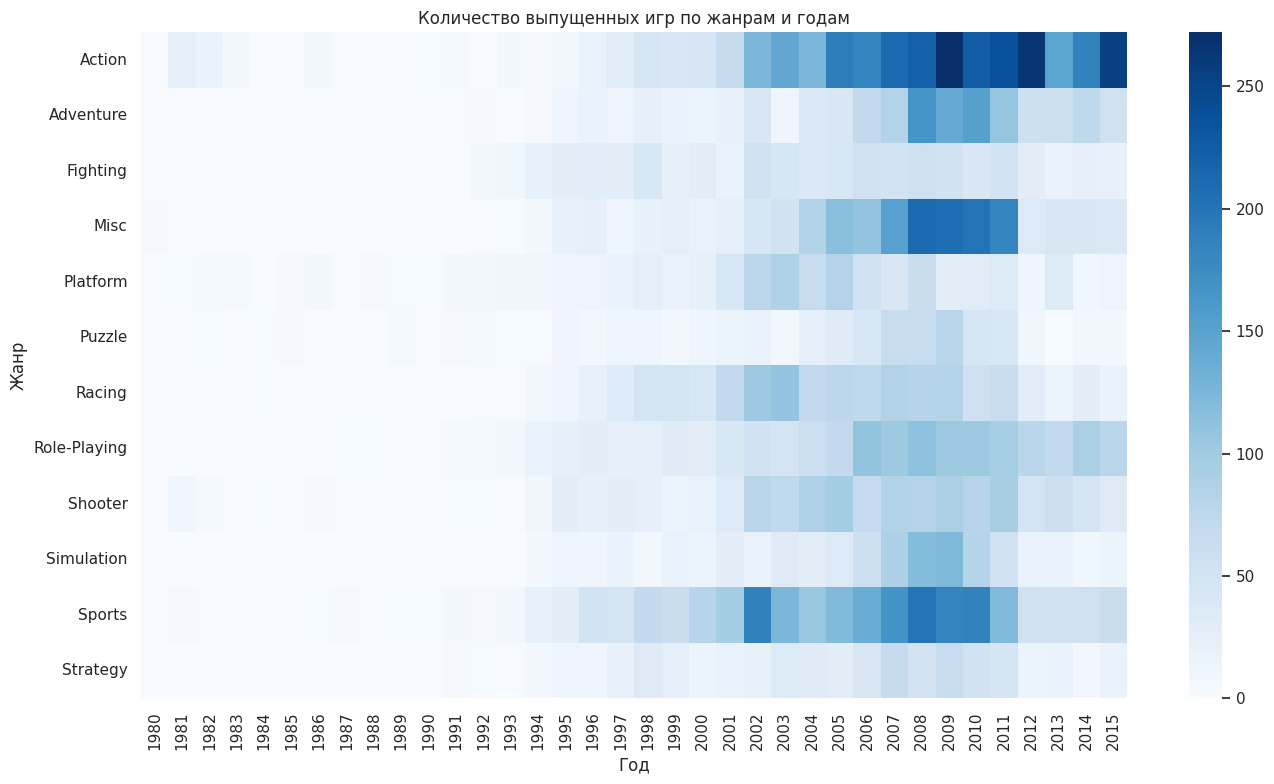

In [16]:
genre_year_counts = df.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
plt.figure(figsize=(14, 8))
sns.heatmap(genre_year_counts.T, cmap='Blues')
plt.title('Количество выпущенных игр по жанрам и годам')
plt.xlabel('Год')
plt.ylabel('Жанр')
plt.tight_layout()
plt.show()

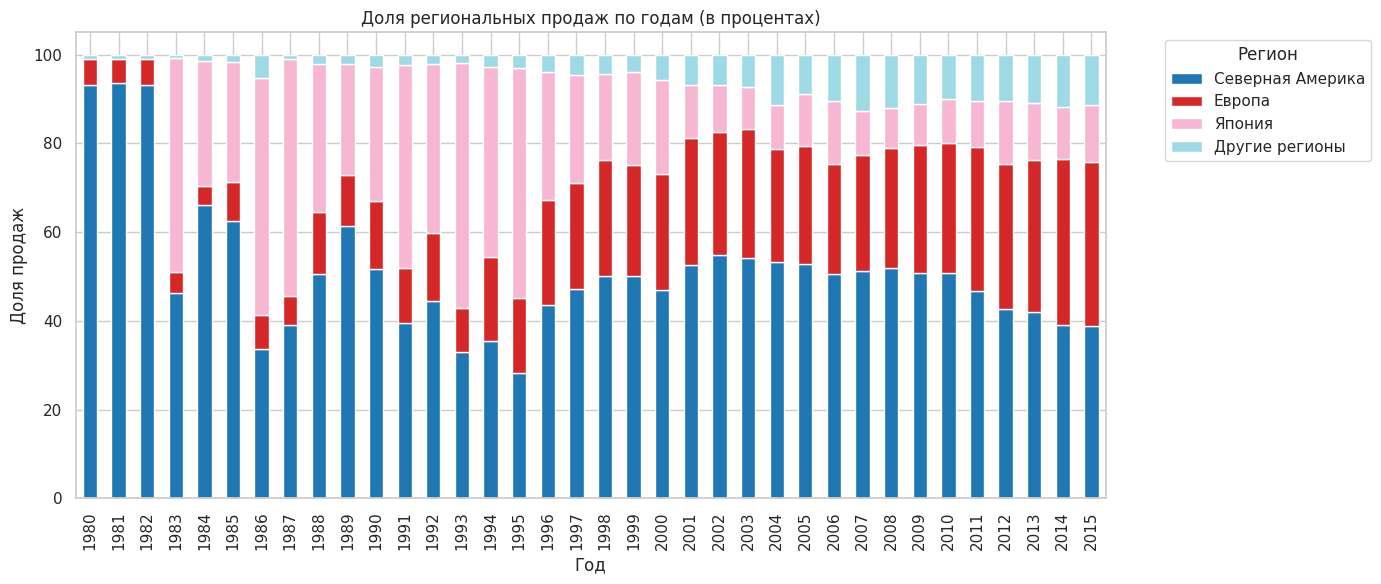

In [17]:
region_sales_pct = region_sales.div(region_sales.sum(axis=1), axis=0) * 100  # нормализуем в проценты
region_sales_pct.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='tab20')
plt.title('Доля региональных продаж по годам (в процентах)')
plt.xlabel('Год')
plt.ylabel('Доля продаж')
plt.legend(title='Регион', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()